<a href="https://colab.research.google.com/github/luilambu/Talleres-Analitica-de-Neg-2022-2/blob/main/TallerFoodcsv_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El fichero Food.csv contiene información sobre el Product Food Index. Escribir un programa con los siguientes puntos:

1.Limpiar la base de datos para que queden solo las columnas Date, Food Index Price, Meat, Dairy, Oils, Sugar. Y en la fila, solo tener datos con fecha y por último, mostrar 15 datos aleatorios.

2.Mostrar la media de los precios del Dairy.

3.Mostrar la mediana de los precios del Sugar para el mes de Octubre.

4.Mostrar los percentiles en 3 cuartiles del Food Index Price.

5.Mostrar la media de los precios de Oils, solamente de los datos del mes de Febrero.

6.Mostrar el rango del precio de Sugar para el año 2012.

7.Mostar el precio máximo y mínimo de Meat y mostrar que fecha fue.

8.Mostrar la varianza y la desviación estandar del Food Price Index

9.Realizar una regresión lineal entre Meat(V. Independiente) y FPI(V. Dependiente).
1. Mostrar la ecuación con la intersección y el coeficiente
2.Mostrar la gráfica de la regresión
3.Mostrar que tan confiable es el modelo



In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import scipy as sy
import statsmodels as sts
import statistics as stat
import statsmodels.formula.api as smf

%cd /content/drive/MyDrive/Colab\ Notebooks


[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks'
/content


In [ ]:
#Punto 1 1.Limpiar la base de datos para que queden solo las columnas Date, Food Index Price, Meat, Dairy, Oils, Sugar. Y en la fila, solo tener datos con fecha y por último, mostrar 15 datos aleatorios.

In [ ]:
food=pd.read_csv("Food.csv", header=2,usecols=[0,1,2,3,5,6])
food
largo=len(food)
food=food.drop(0)
food
food[['Año','Mes']]=food.Date.str.split('-',expand=True)
print(food.sample(15,random_state=7))

        Date  Food Price Index   Meat  Dairy    Oils  Sugar   Año Mes
239  2009-11              98.8   83.7  113.1  101.76  137.8  2009  11
271  2012-07             122.1  100.4   99.7  138.56  141.4  2012  07
214  2007-10             107.6   79.2  148.0  125.85   61.9  2007  10
359  2019-11              98.6  106.5  102.5   93.16   79.2  2019  11
58   1994-10              69.9   78.1   52.0   79.00   78.9  1994  10
385  2022-01             135.6  112.1  132.6  185.90  112.7  2022  01
31   1992-07              64.4   78.6   58.1   51.93   63.8  1992  07
61   1995-01              72.9   78.6   58.9   82.66   91.3  1995  01
102  1998-06              64.2   66.2   55.6   82.76   50.1  1998  06
148  2002-04              51.0   56.3   48.9   48.97   42.6  2002  04
52   1994-04              63.7   72.9   42.3   63.66   68.1  1994  04
241  2010-01             101.5   85.0  109.0  107.10  163.8  2010  01
110  1999-02              58.4   62.8   51.5   68.40   42.2  1999  02
66   1995-06        

In [ ]:
#Punto 2 Mostrar la media de los precios del Dairy.
meandairy=food['Dairy'].mean()
print(meandairy)

83.97302798982187


In [ ]:
#Punto 3 Mostrar la mediana de los precios del Sugar para el mes de Octubre.
octubre=food.loc[food['Mes']=='10']
p3=octubre['Sugar'].median()
print(p3)

72.65


In [ ]:
#Punto 4 Mostrar los percentiles en 3 cuartiles del Food Index Price.
qip1=food['Food Price Index'].quantile(0.25)
qip2=food['Food Price Index'].quantile(0.50)
qip3=food['Food Price Index'].quantile(0.75)
print(qip1)
print(qip2)
print(qip3)

63.8
78.6
99.4


In [ ]:
#Punto 5 Mostrar la media de los precios de Oils, solamente de los datos del mes de Febrero.
febrero=food.loc[food['Mes']=='02']
p4=febrero['Oils'].mean()
print(p4)

89.66212121212119


In [ ]:
#Punto 6 Mostrar el rango del precio de Sugar para el año 2012.
año2012=food.loc[food['Año']=='2012']
rango=año2012['Sugar'].max()-año2012['Sugar'].min()
print(rango)

29.80000000000001


In [ ]:
#Punto 7 Mostar el precio máximo y mínimo de Meat y mostrar que fecha fue.
  #Min
meatmin=food['Meat'].min()
meatmin=food.loc[food['Meat']==meatmin]
print(meatmin)

        Date  Food Price Index  Meat  Dairy   Oils  Sugar   Año Mes
156  2002-12              55.6  51.1   49.3  65.51   49.2  2002  12


In [ ]:
  #Max
meatmax=food['Meat'].max()
meatmax=food.loc[food['Meat']==meatmax]
print(meatmax)

        Date  Food Price Index   Meat  Dairy   Oils  Sugar   Año Mes
390  2022-06             154.7  125.9  150.2  211.8  117.3  2022  06


In [ ]:
#Punto 8 Mostrar la varianza y la desviación estandar del Food Price Index
  #Varianza
varfp=food['Food Price Index'].var(ddof=0)
print(varfp)

671.7672925043217


In [ ]:
  #Desviación Estandar
dsfp=food['Food Price Index'].std(ddof=0)
print(dsfp)

25.918473961719307


In [ ]:
#Punto 9 Realizar una regresión lineal entre Meat(V. Independiente) y FPI(V. Dependiente).

Mostrar la ecuación con la intersección y el coeficiente
Mostrar la gráfica de la regresión
Mostrar que tan confiable es el modelo



{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Meat'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[1.36139771]]),
 '_residues': array([54381.72162551]),
 'rank_': 1,
 'singular_': array([336.30573195]),
 'intercept_': array([-29.00923267])}

In [ ]:
# Punto 9.1
X=food['Meat']
Y=food['Food Price Index']
ln=LinearRegression().fit(X, Y)
print(ln)

LinearRegression()


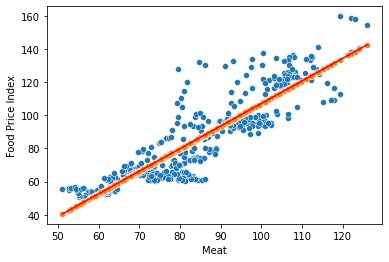

In [ ]:
#Punto 9.2


In [ ]:

#Punto 9.3


0.7940121772185362